In [ ]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import mlflow
import mlflow.sklearn
import dagshub
import pickle
from mlflow.tracking import MlflowClient

In [21]:
df = pd.read_csv("c:/Users/MSI/MLOps_Project/notebooks/modeling_data2.csv")

In [22]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption
0,0,3,0,0,0,0,0,1,0,10,-1.886174,-2.383754,-2.140153,1,0.000000,0.250000,0.133333
1,3,4,1,0,0,0,1,0,0,8,-0.678454,0.317711,0.835540,0,0.133333,0.100000,0.025000
2,2,4,0,0,0,0,0,0,1,12,1.922790,0.317711,-0.594931,1,0.000000,0.066667,0.033333
3,2,4,0,0,0,0,0,1,1,8,1.179578,3.502428,2.822479,0,0.000000,0.100000,0.100000
4,2,4,1,0,0,0,0,1,0,9,-0.492651,1.306005,1.852589,1,0.100000,0.250000,0.066667


# Data Split

In [23]:
# Define the features and target
X = df.drop('Heart_Disease', axis=1)
y = df['Heart_Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Desicion Tree


In [24]:
model_dt = DecisionTreeClassifier(
    random_state=42,  
)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [25]:
y_pred_dt = model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy_dt * 100:.2f}%")

Accuracy: 93.51%


In [26]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      9239
           1       0.83      0.99      0.90      3952

    accuracy                           0.94     13191
   macro avg       0.91      0.95      0.93     13191
weighted avg       0.94      0.94      0.94     13191


Confusion Matrix:
[[8426  813]
 [  43 3909]]


RandomForestClassifier:¶


In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 98.14%


In [29]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[9051  188]
 [  58 3894]]


In [30]:
importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                         Feature  Importance
8                   Age_Category    0.155339
11                           BMI    0.130472
10                   Weight_(kg)    0.113749
0                 General_Health    0.101144
9                    Height_(cm)    0.085009
15  Green_Vegetables_Consumption    0.083744
14             Fruit_Consumption    0.082607
13           Alcohol_Consumption    0.059431
5                       Diabetes    0.036492
6                      Arthritis    0.032976
12               Smoking_History    0.022835
1                        Checkup    0.022374
7                            Sex    0.021685
2                       Exercise    0.019013
3                    Skin_Cancer    0.017096
4                   Other_Cancer    0.016035


In [31]:
# Sauvegarder le modèle
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_classifier, f)
print("Modèle sauvegardé sous le nom 'random_forest_model.pkl'")

Modèle sauvegardé sous le nom 'random_forest_model.pkl'


In [32]:
##with open('random_forest_model.pkl', 'rb') as f:
  ##  rf_model_loaded = pickle.load(f)
#pour le test

xgBoost


In [33]:

model = XGBClassifier(
    eval_metric='logloss',  
    use_label_encoder=False  
)

In [34]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [35]:
y_pred = model.predict(X_test)

In [36]:
print("Classification Report :\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      9239
           1       0.77      0.76      0.77      3952

    accuracy                           0.86     13191
   macro avg       0.84      0.83      0.83     13191
weighted avg       0.86      0.86      0.86     13191

Accuracy Score: 0.8609658100219847
Confusion Matrix:
 [[8358  881]
 [ 953 2999]]


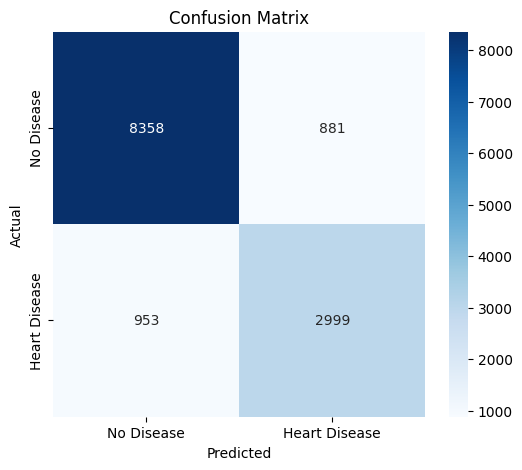

In [37]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Heart Disease'], yticklabels=['No Disease', 'Heart Disease'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


XGboost with inblanced data

In [38]:
df1 = pd.read_csv("c:/Users/MSI/mlops/notebooks/modeling_data1.csv")

In [39]:
df1.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption
0,0,3,0,0,0,0,0,1,0,10,-1.886174,-2.383754,-2.140153,1,0.000000,0.250000,0.133333
1,3,4,0,1,0,0,1,0,0,10,-0.492651,-0.231395,0.021272,0,0.000000,0.250000,0.000000
2,3,4,1,0,0,0,1,0,0,8,-0.678454,0.317711,0.835540,0,0.133333,0.100000,0.025000
3,0,4,1,1,0,0,1,0,1,11,0.900873,0.559337,0.090438,0,0.000000,0.250000,0.250000
4,2,4,0,0,0,0,0,0,1,12,1.922790,0.317711,-0.594931,1,0.000000,0.066667,0.033333


In [40]:
X1 = df1.drop(columns=['Heart_Disease']) 
y1 = df1['Heart_Disease'] 

In [41]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [42]:
model = XGBClassifier(
    eval_metric='logloss', 
    use_label_encoder=False  
)
model.fit(X1_train, y1_train)
y1_pred = model.predict(X1_test)

Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      9239
           1       0.77      0.76      0.77      3952

    accuracy                           0.86     13191
   macro avg       0.84      0.83      0.83     13191
weighted avg       0.86      0.86      0.86     13191

Accuracy Score: 0.9219
Confusion Matrix:
 [[9158   73]
 [ 708   61]]


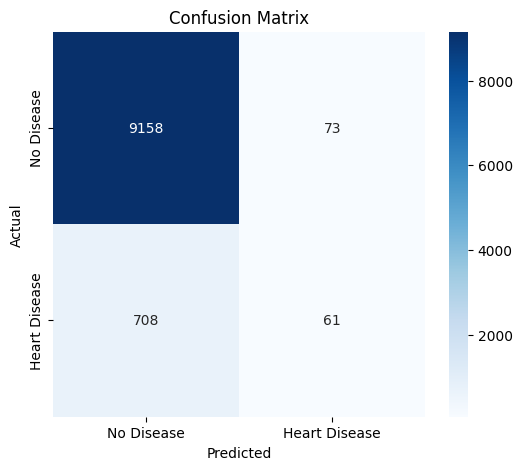

In [43]:
print("Classification Report :\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y1_test, y1_pred))
print("Confusion Matrix:\n", confusion_matrix(y1_test, y1_pred))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y1_test, y1_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Heart Disease'], yticklabels=['No Disease', 'Heart Disease'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



# Model Tracking

## Descion Tree

In [ ]:
mlflow.set_tracking_uri("https://dagshub.com/RimMth/mlops.mlflow")
print(mlflow.get_tracking_uri())

https://dagshub.com/RimMth/mlops.mlflow


In [45]:
experiment_name = "decion_tree"
mlflow.set_tracking_uri("https://dagshub.com/RimMth/mlops.mlflow")
dagshub.init(repo_owner='RimMth', repo_name='mlops', mlflow=True)
experiment_id = mlflow.create_experiment(experiment_name) if mlflow.get_experiment_by_name(experiment_name) is None else mlflow.get_experiment_by_name(experiment_name).experiment_id
with mlflow.start_run(experiment_id=experiment_id):
    model_dt = DecisionTreeClassifier(random_state=42)
    model_dt.fit(X_train, y_train)
    y_pred_dt = model_dt.predict(X_test)
    accuracy_dt = accuracy_score(y_test, y_pred_dt)
    
    input_signature = mlflow.models.signature.infer_signature(X_train, y_pred_dt)
    
    example_input = X_train.iloc[:1]  
    mlflow.log_param("random_state", 42)
    mlflow.log_metric("accuracy", accuracy_dt)
    mlflow.sklearn.log_model(model_dt, "decision_tree_model", signature=input_signature, input_example=example_input)
    
    print(f"Accuracy: {accuracy_dt * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_dt))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred_dt))

Accessing as RimMth

Initialized MLflow to track repo "RimMth/mlops"

Repository RimMth/mlops initialized!

Accuracy: 93.51%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      9239
           1       0.83      0.99      0.90      3952

    accuracy                           0.94     13191
   macro avg       0.91      0.95      0.93     13191
weighted avg       0.94      0.94      0.94     13191


Confusion Matrix:
[[8426  813]
 [  43 3909]]
🏃 View run painted-bear-144 at: https://dagshub.com/RimMth/mlops.mlflow/#/experiments/1/runs/a37f9c284eba43cc9e32f5eef579123c
🧪 View experiment at: https://dagshub.com/RimMth/mlops.mlflow/#/experiments/1


# Random Forest

In [46]:
experiment_name = "random_forest_experiment"
mlflow.set_tracking_uri("https://dagshub.com/RimMth/mlops.mlflow")
dagshub.init(repo_owner='RimMth', repo_name='mlops', mlflow=True)
experiment_id = (
    mlflow.create_experiment(experiment_name)
    if mlflow.get_experiment_by_name(experiment_name) is None
    else mlflow.get_experiment_by_name(experiment_name).experiment_id
)
with mlflow.start_run(experiment_id=experiment_id):
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train, y_train)

    y_pred_rf = rf_classifier.predict(X_test)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)

    input_signature = mlflow.models.signature.infer_signature(X_train, y_pred_rf)
    example_input = X_train.iloc[:1]

    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("random_state", 42)
    mlflow.log_metric("accuracy", accuracy_rf)

    mlflow.sklearn.log_model(
        rf_classifier,
        "random_forest_model",
        signature=input_signature,
        input_example=example_input,
    )

    print(f"Accuracy: {accuracy_rf * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_rf))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred_rf))

    importances = rf_classifier.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    feature_importance_df.to_csv("feature_importances_rf.csv", index=False)
    mlflow.log_artifact("feature_importances_rf.csv")

    print("\nFeature Importances:")
    print(feature_importance_df)

print(f"🏃 View run at: https://dagshub.com/RimMth/mlops.mlflow/#/experiments/{experiment_id}")


Initialized MLflow to track repo "RimMth/mlops"

Repository RimMth/mlops initialized!

Accuracy: 98.14%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      9239
           1       0.95      0.99      0.97      3952

    accuracy                           0.98     13191
   macro avg       0.97      0.98      0.98     13191
weighted avg       0.98      0.98      0.98     13191


Confusion Matrix:
[[9051  188]
 [  58 3894]]

Feature Importances:
                         Feature  Importance
8                   Age_Category    0.155339
11                           BMI    0.130472
10                   Weight_(kg)    0.113749
0                 General_Health    0.101144
9                    Height_(cm)    0.085009
15  Green_Vegetables_Consumption    0.083744
14             Fruit_Consumption    0.082607
13           Alcohol_Consumption    0.059431
5                       Diabetes    0.036492
6                      Arthritis    0.032976
12               Smoking_History    0.022835
1                       

## model enregistration

In [ ]:
# Initialize DagsHub and MLflow integration
dagshub.init(repo_owner='RimMth', repo_name='mlops', mlflow=True)

mlflow.set_experiment("random_forest_experiment")

# Set the tracking URI for MLflow to log the experiment in DagsHub
mlflow.set_tracking_uri("https://dagshub.com/RimMth/mlops.mlflow") 

run_id = "e112b7fca3bf4a28aca2476525c58167"
model_name = "Random Forest" 

# Create an MLflow client
client = MlflowClient()

# Create the model URI
model_uri = f"runs:/{run_id}/artifacts/{model_name}"

# Register the model
reg = mlflow.register_model(model_uri, model_name)

# Get the model version
model_version = reg.version  # Get the registered model version

# Transition the model version to Staging
new_stage = "Staging"

client.transition_model_version_stage(
    name=model_name,
    version=model_version,
    stage=new_stage,
    archive_existing_versions=True
)

print(f"Model {model_name} version {model_version} transitioned to {new_stage} stage.")

Initialized MLflow to track repo "RimMth/mlops"

Repository RimMth/mlops initialized!

Successfully registered model 'Random Forest'.
2024/12/02 14:40:55 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random Forest, version 1
Created version '1' of model 'Random Forest'.


Model Random Forest version 1 transitioned to Staging stage.


# Xgboost

2024/12/02 14:40:56 INFO mlflow.tracking.fluent: Experiment with name 'xgboost_experiment' does not exist. Creating a new experiment.


Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      9231
           1       0.46      0.08      0.14       769

    accuracy                           0.92     10000
   macro avg       0.69      0.54      0.55     10000
weighted avg       0.89      0.92      0.90     10000

Accuracy Score: 0.9219
Confusion Matrix:
 [[9158   73]
 [ 708   61]]


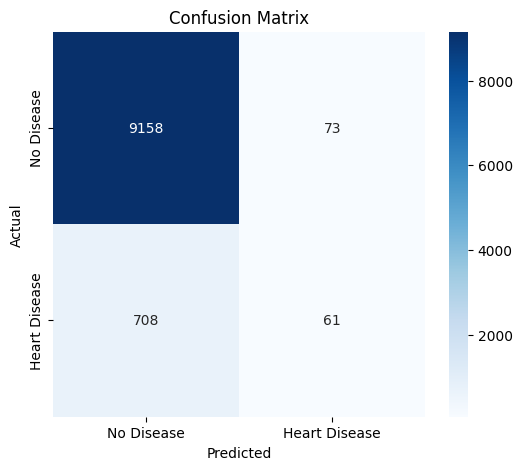

2024/12/02 14:41:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run completed. View details at: https://dagshub.com/RimMth/mlops.mlflow
🏃 View run xgboost_model_run at: https://dagshub.com/RimMth/mlops.mlflow/#/experiments/3/runs/50f60e50fe5f46d89fc8c84aac96830d
🧪 View experiment at: https://dagshub.com/RimMth/mlops.mlflow/#/experiments/3


In [ ]:
mlflow.set_tracking_uri("https://dagshub.com/RimMth/mlops.mlflow")
mlflow.set_experiment("xgboost_experiment")

X1 = df1.drop(columns=['Heart_Disease'])
y1 = df1['Heart_Disease']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

client = MlflowClient()
if not client.get_experiment_by_name("xgboost_experiment"):
    client.create_experiment("xgboost_experiment")

with mlflow.start_run(run_name="xgboost_model_run"):
    model = XGBClassifier(eval_metric='logloss', use_label_encoder=False)
    model.fit(X1_train, y1_train)
    
    y1_pred = model.predict(X1_test)
    
    accuracy = accuracy_score(y1_test, y1_pred)
    print("Classification Report :\n", classification_report(y1_test, y1_pred))
    print("Accuracy Score:", accuracy)
    print("Confusion Matrix:\n", confusion_matrix(y1_test, y1_pred))
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(confusion_matrix(y1_test, y1_pred), annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Disease', 'Heart Disease'], yticklabels=['No Disease', 'Heart Disease'])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    mlflow.log_param("model_type", "XGBoost")
    mlflow.log_param("random_state", 42)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.sklearn.log_model(model, artifact_path="xgboost_model")
    
    input_example = X1_train.iloc[:1]
    signature = mlflow.models.signature.infer_signature(X1_train, y1_pred)
    mlflow.sklearn.log_model(model, "xgboost_model", input_example=input_example, signature=signature)

    print(f"Run completed. View details at: {mlflow.get_tracking_uri()}")
